In [1]:
 # Подгрузим пакеты 
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

# Задания для самостоятельного решения

**Замечание: 1** Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.

**Замечание: 2** Для зачета уже достаточно половины абсолютно верно решенных заданий. 

Если возникают сложности по ходу решения - пиште свой вопрос в общий чат в Slack. Там всегда подскажут) 




<div class="alert alert-info">
<b>Задание № 1 (Обязательно)</b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [2]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код.

In [3]:
# Так как выборки независимые (люди разные) и распределение нормальное, применяем t - тест для независимых выборок
result = stats.ttest_ind(A, B)
alpha = 0.05
if (result.pvalue < alpha):
    print( 'Отвергаем нулевую гипотезу')
else:
    print(f'pvalue = {round(result.pvalue,3)}. Не отвергаем нулевую гипотезу, различия в препаратах нет')

pvalue = 0.085. Не отвергаем нулевую гипотезу, различия в препаратах нет


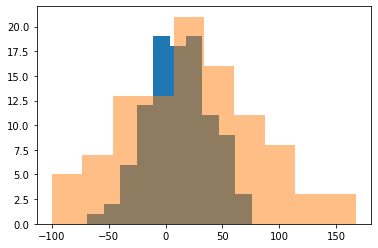

In [4]:
plt.hist(A, bins=10)
plt.hist(B, bins=10, alpha=0.5);

<div class="alert alert-info">
<b>Задание № 2 (Обязательно)</b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

In [5]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код.

In [6]:
# Так как выборки зависимые и распределение нормальное, применяем t - тест для зависимых выборок
result = stats.ttest_rel(A, B)
alpha = 0.05
if (result.pvalue < alpha):
    print( f'pvalue = {round(result.pvalue,3)}. Отвергаем нулевую гипотезу, препарат действует')
else:
    print(f'pvalue = {round(result.pvalue,3)}. Не отвергаем нулевую гипотезу, препарат не действует')

pvalue = 0.032. Отвергаем нулевую гипотезу, препарат действует


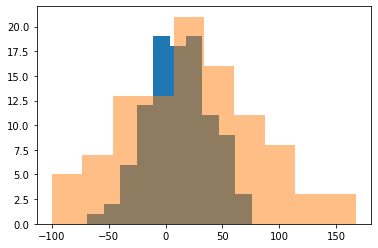

In [7]:
plt.hist(A, bins=10)
plt.hist(B, bins=10, alpha=0.5);

<div class="alert alert-info">
<b>Задание № 3 (Обязательно)</b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
`water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]`

`nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]`

`mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]`
</div>

In [8]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

# Ваш код.

In [9]:
F, p = stats.f_oneway(water, nutri, mineral)
alpha = 0.05 
print(F, p)

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

12.525963044834192 2.9240047906326866e-05
Разное распределение (отклоняем H0)


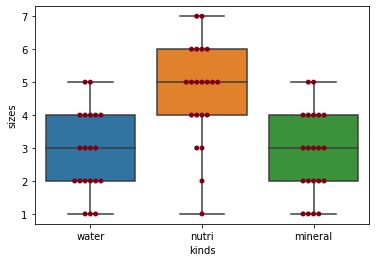

In [10]:
sizes = water + nutri + mineral
kinds = ['water']*len(water) + ['nutri']*len(nutri)+['mineral']*len(mineral)
df = pd.DataFrame()
df['sizes'] = sizes
df['kinds'] = kinds


ax = sns.boxplot(x='kinds', y='sizes', data=df)
ax = sns.swarmplot(x="kinds", y="sizes", data=df, color='#7d0013')
# plt.show()

#### На графике видно, что способ с удобрениями значительно отличается от двух других, что также подтверждает дисперсионный анализ.

# Cookie Cats (Обязательно)

<div class="alert alert-info">
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. Посмотрите эту короткую демонстрацию:
</div>

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>
 
 
<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


<div class="alert alert-info">
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
</div>

<div class="alert alert-info">
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.
</div>

# Данные A/B тестирования

In [11]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычном `matplotlib`
</div>

In [12]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [13]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').sum()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,222944098441,2344795,20034,8502
gate_40,227857702576,2333530,20119,8279


#### Ваши выводы: в версию gate_40 играло больше пользователей, но в версии gate_30 сыграно больше раундов и retention_7 тоже выше.

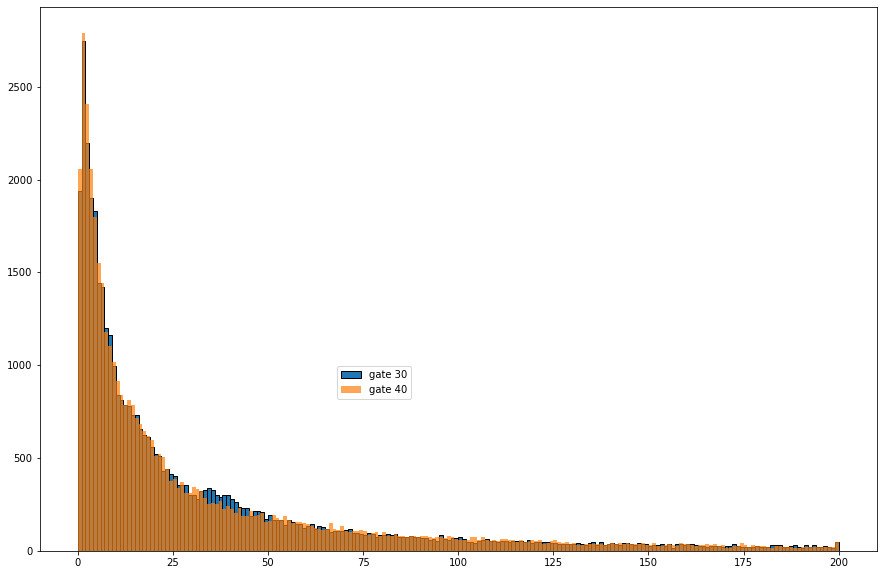

In [14]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1, edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

#### Ваши выводы: Распределение очень похоже, однозначный вывод сделать нельзя.

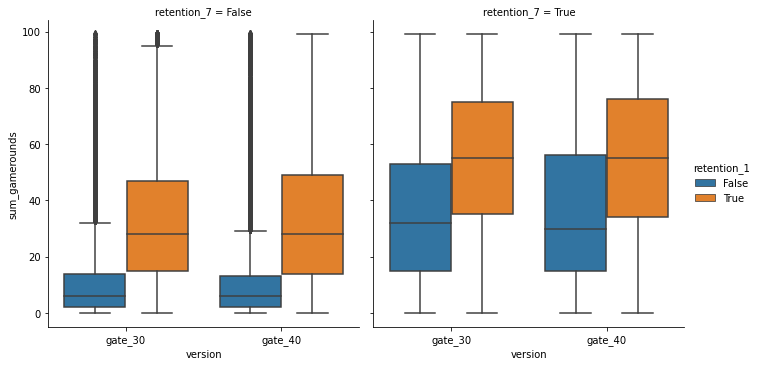

In [15]:
df = data.loc[data['sum_gamerounds'] < 100].copy();
sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


#### Используя любой тест для проверки статистической гипотезы, продемонстрируйте наличие эффекта из-за сдвига ворот.

In [16]:
from scipy.stats import f_oneway 
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

#Ваш код. 
stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'],data[data['version'] == 'gate_40']['sum_gamerounds'])
stat, p 

(1009027049.5, 0.025104403860221253)

#### Так как pvalue < 0,05 делаем вывод что выборки различаются.

<Figure size 1080x720 with 0 Axes>

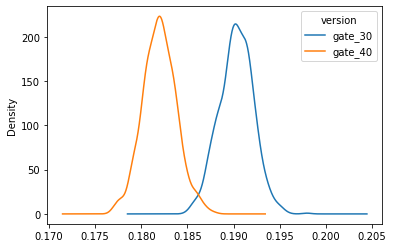

In [17]:
# Используем bootstrap.
# Creating an list with bootstrapped means for each AB-group
plt.figure(figsize=(15, 10))

boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1, replace = True).groupby('version')['retention_7'].mean()
    boot_1d.append(boot_mean)
    
# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density');

In [18]:
stats.ttest_ind(boot_1d['gate_30'],boot_1d['gate_40'])

Ttest_indResult(statistic=101.4350314319558, pvalue=0.0)

**Ваши выводы?** 

 #### С помощью технологии bootstrap, которая позволила получить нормальные распределения средних путем многократных выборок из исследуемых групп, стало возможным применение t - теста. Так как pvalue < 0,05 делаем вывод что выборки различаются и так как среднее выборок по группе gate_30 больше, т.е. больше людей на 7 день вернулось в игру то необходимо применить именно этот вариант.

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [19]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.head()

 
#Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
#что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [20]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pid        800 non-null    int64 
 1   Name       799 non-null    object
 2   Class 1    800 non-null    object
 3   Class 2    414 non-null    object
 4   HP         800 non-null    int64 
 5   Attack     800 non-null    int64 
 6   Defense    800 non-null    int64 
 7   Sp. Atk    800 non-null    int64 
 8   Sp. Def    800 non-null    int64 
 9   Speed      800 non-null    int64 
 10  Legendary  800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB


# Задачи

<div class="alert alert-info">
<b>Задание № 1 (Обязательно):</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [21]:
Grass = pokemon[(pokemon['Class 2'].isna()) & (pokemon['Class 1'] == 'Grass')]
Rock = pokemon[(pokemon['Class 2'].isna()) & (pokemon['Class 1'] == 'Rock')]

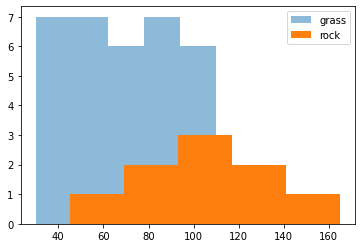

In [22]:
plt.hist(Grass['Attack'], bins=5, label='grass', alpha=0.5)
plt.hist(Rock['Attack'], bins=5, label='rock');
plt.legend();

In [23]:
# H0: средняя обычная атака у обоих классов одинаковая
# H1: средняя обычная атака у классов разная

result = stats.ttest_ind(Grass['Attack'], Rock['Attack'], equal_var=False)
print(result)
alpha = 0.05
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, средняя обычная атака у классов разная')
else:
    print('Не отвергаем нулевую гипотезу')

Ttest_indResult(statistic=-2.7754037281165433, pvalue=0.019973063777980117)
Отвергаем нулевую гипотезу, средняя обычная атака у классов разная


In [24]:
a = int(Grass['Attack'].mean())
b = int(Rock['Attack'].mean())

In [25]:
print(f'Средняя сила обычной атаки у покемонов класса Grass {a} - это меньше, чем у класса Rock {b}')

Средняя сила обычной атаки у покемонов класса Grass 68 - это меньше, чем у класса Rock 103


<div class="alert alert-info">
<b>Задание № 2 (Обязательно):</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [26]:
Water = pokemon[(pokemon['Class 2'].isna()) & (pokemon['Class 1'] == 'Water')]
Normal = pokemon[(pokemon['Class 2'].isna()) & (pokemon['Class 1'] == 'Normal')]

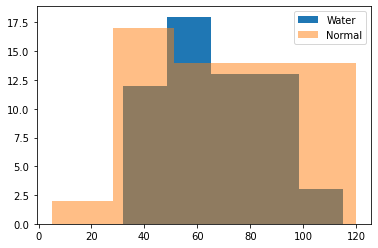

In [27]:
plt.hist(Water['Speed'], bins=5, label='Water')
plt.hist(Normal['Speed'], bins=5, label='Normal', alpha=0.5);
plt.legend();

In [28]:
# H0: средняя скорость у обоих классов одинаковая
# H1: средняя скорость у классов разная

result = stats.ttest_ind(Water['Speed'], Normal['Speed'], equal_var=False)
print(result)
alpha = 0.05
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, средняя скорость у классов разная')
else:
    print('Не отвергаем нулевую гипотезу, средняя скорость у обоих классов одинаковая')

Ttest_indResult(statistic=-0.35489147881361166, pvalue=0.7233619838773337)
Не отвергаем нулевую гипотезу, средняя скорость у обоих классов одинаковая


<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [29]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

In [30]:
pokemon_s = pokemon[(pokemon['Name'].isin(treathed_pokemon))]
pokemon_s

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


#### Где взять данные о скорости после приема сыворотки???

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [31]:
pokemon_l = pokemon[(pokemon['Legendary'] == True)][['HP','Attack','Defense']]
pokemon_l['Sum'] = pokemon_l['HP'] + pokemon_l['Attack'] + pokemon_l['Defense']
pokemon_l['Prod'] = pokemon_l['HP'] * pokemon_l['Attack'] * pokemon_l['Defense']
pokemon_l.head()

,HP,Attack,Defense,Sum,Prod
156,90,85,100,275,765000
157,90,90,85,265,688500
158,90,100,90,280,810000
162,106,110,90,306,1049400
163,106,190,100,396,2014000


In [32]:
pokemon_not_l = pokemon[(pokemon['Legendary'] == False)][['HP','Attack','Defense']]
pokemon_not_l['Sum'] = pokemon_not_l['HP'] + pokemon_not_l['Attack'] + pokemon_not_l['Defense']
pokemon_not_l['Prod'] = pokemon_not_l['HP'] * pokemon_not_l['Attack'] * pokemon_not_l['Defense']
pokemon_not_l.head()

,HP,Attack,Defense,Sum,Prod
0,45,49,49,143,108045
1,60,62,63,185,234360
2,80,82,83,245,544480
3,80,100,123,303,984000
4,39,52,43,134,87204


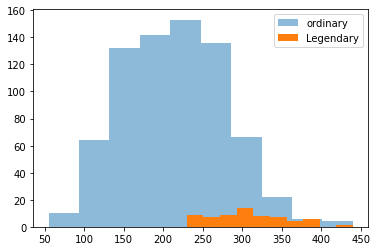

In [33]:
plt.hist(pokemon_not_l['Sum'], bins=10, label='ordinary', alpha=0.5)
plt.hist(pokemon_l['Sum'], bins=10, label='Legendary');
plt.legend();

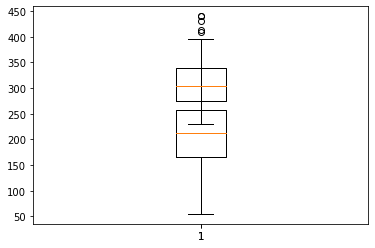

In [34]:
plt.boxplot(pokemon_not_l['Sum'])
plt.boxplot(pokemon_l['Sum']);

In [35]:
# H0: средняя сумма показателей у обоих классов одинаковая
# H1: средняя сумма показателей у классов разная

result = stats.ttest_ind(pokemon_not_l['Sum'], pokemon_l['Sum'], equal_var=False)
print(result)
alpha = 0.05
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, средняя сумма показателей у классов разная')
else:
    print('Не отвергаем нулевую гипотезу, средняя сумма показателей у обоих классов одинаковая')

Ttest_indResult(statistic=-15.19759110757148, pvalue=2.9282718703329855e-26)
Отвергаем нулевую гипотезу, средняя сумма показателей у классов разная


Средняя сумма показателей у легендарных покемонов больше, чем у обычных

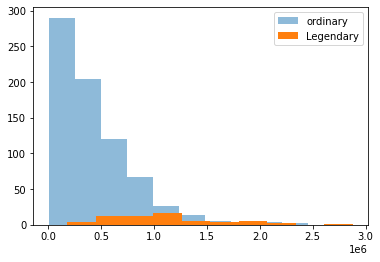

In [36]:
plt.hist(pokemon_not_l['Prod'], bins=10, label='ordinary', alpha=0.5)
plt.hist(pokemon_l['Prod'], bins=10, label='Legendary');
plt.legend();

In [37]:
# H0: среднee произведение показателей у обоих классов одинаковое
# H1: среднee произведение показателей у классов разное

result = stats.ttest_ind(pokemon_not_l['Prod'], pokemon_l['Prod'], equal_var=False)
print(result)
alpha = 0.05
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, среднee произведение показателей у классов разное')
else:
    print('Не отвергаем нулевую гипотезу, среднee произведение показателей у обоих классов одинаковое')

Ttest_indResult(statistic=-10.079078507434385, pvalue=2.895038880907388e-15)
Отвергаем нулевую гипотезу, среднee произведение показателей у классов разное


Среднee произведение показателей у легендарных покемонов больше, чем у обычных

<div class="alert alert-info">
<b>Задание № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [38]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [39]:
best_defence = pokemon[(pokemon['Class 2'].isin(best_defence_class)) | (pokemon['Class 1'].isin(best_defence_class))][['Class 1','Class 2','Defense']]
best_defence.head()

,Class 1,Class 2,Defense
32,Ground,NaN,85
33,Ground,NaN,110
36,Poison,Ground,87
39,Poison,Ground,77
55,Ground,NaN,25


In [40]:
best_defence['Class'] = np.where(best_defence['Class 1'].isin(best_defence_class), best_defence['Class 1'], best_defence['Class 2'])
best_defence.head()

,Class 1,Class 2,Defense,Class
32,Ground,NaN,85,Ground
33,Ground,NaN,110,Ground
36,Poison,Ground,87,Ground
39,Poison,Ground,77,Ground
55,Ground,NaN,25,Ground


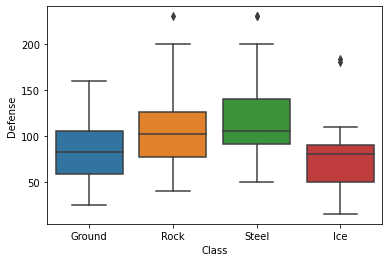

In [41]:
sns.boxplot(x="Class", y="Defense", 
            data=best_defence);

In [42]:
# H0: классы не различаются
# H1: классы различаются статистически значимо

F, p = stats.f_oneway(best_defence[best_defence['Class'] == 'Rock']['Defense'], best_defence[best_defence['Class'] == 'Ground']['Defense'], best_defence[best_defence['Class'] == 'Steel']['Defense'], best_defence[best_defence['Class'] == 'Ice']['Defense'])  # дисперсионный анализ (ДА) в python

alpha = 0.05  # Уровень значимости
print(F, p)   # Смотрим на результаты ДА

if p > alpha:
    print('классы не различаются (не отвергаем H0)')
else:
    print('классы различаются статистически значимо (отклоняем H0)')

11.715539919260674 4.6040232211311826e-07
классы различаются статистически значимо (отклоняем H0)
